# Customer Data Analysis Notebook
### Pre-Clustering EDA for SmartShopping System


In [278]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import ast  # For safely evaluating strings containing Python literals


In [279]:
# Set visual style for matplotlib and seaborn
sns.set_palette("husl")
%matplotlib inline

## 1. Data Loading & Initial Inspection


In [280]:

# Load datasets
users = pd.read_csv("../data/customer_data_collection.csv")
products = pd.read_csv("../data/product_recommendation_data.csv")

# Convert string lists to actual lists
def safe_convert_to_list(x):
    try:
        return ast.literal_eval(x) if pd.notna(x) else []
    except:
        return []

for col in ['Browsing_History', 'Purchase_History', 'Similar_Product_List']:
    if col in users:
        users[col] = users[col].apply(safe_convert_to_list)
    if col in products:
        products[col] = products[col].apply(safe_convert_to_list)


# Initial data inspection
print("Users Data Shape:", users.shape)
print("\nProducts Data Shape:", products.shape)

display(users.head(3))
display(products.head(3))


Users Data Shape: (10000, 11)

Products Data Shape: (10000, 15)


Customer_ID  Age  Gender Location           Browsing_History  \
0       C1000   28  Female  Chennai           [Books, Fashion]   
1       C1001   27    Male    Delhi  [Books, Fitness, Fashion]   
2       C1002   34   Other  Chennai              [Electronics]   

                         Purchase_History    Customer_Segment  \
0                      [Biography, Jeans]         New Visitor   
1  [Biography, Resistance Bands, T-shirt]  Occasional Shopper   
2                            [Smartphone]  Occasional Shopper   

   Avg_Order_Value Holiday  Season  Unnamed: 10  
0          4806.99      No  Winter          NaN  
1           795.03     Yes  Autumn          NaN  
2          1742.45     Yes  Summer          NaN

Product_ID     Category Subcategory  Price    Brand  \
0      P2000      Fashion       Jeans   1713  Brand B   
1      P2001       Beauty    Lipstick   1232  Brand C   
2      P2002  Electronics      Laptop   4833  Brand B   

   Average_Rating_of_Similar_Products  Product_Rating  \
0                                 4.2             2.3   
1                                 4.7             2.1   
2                                 3.5             2.4   

   Customer_Review_Sentiment_Score Holiday  Season Geographical_Location  \
0                             0.26      No  Summer                Canada   
1                             0.21     Yes  Winter                 India   
2                             0.74     Yes  Spring                Canada   

                   Similar_Product_List  Probability_of_Recommendation  \
0                        [Jeans, Shoes]                           0.91   
1     [Moisturizer, Lipstick, Lipstick]                           0.26   
2  [Headphones, Headphones, Smartphone]                           0.60   

   Unnamed: 13  Unnamed: 14  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN

## 2. Customer Data Deep Dive


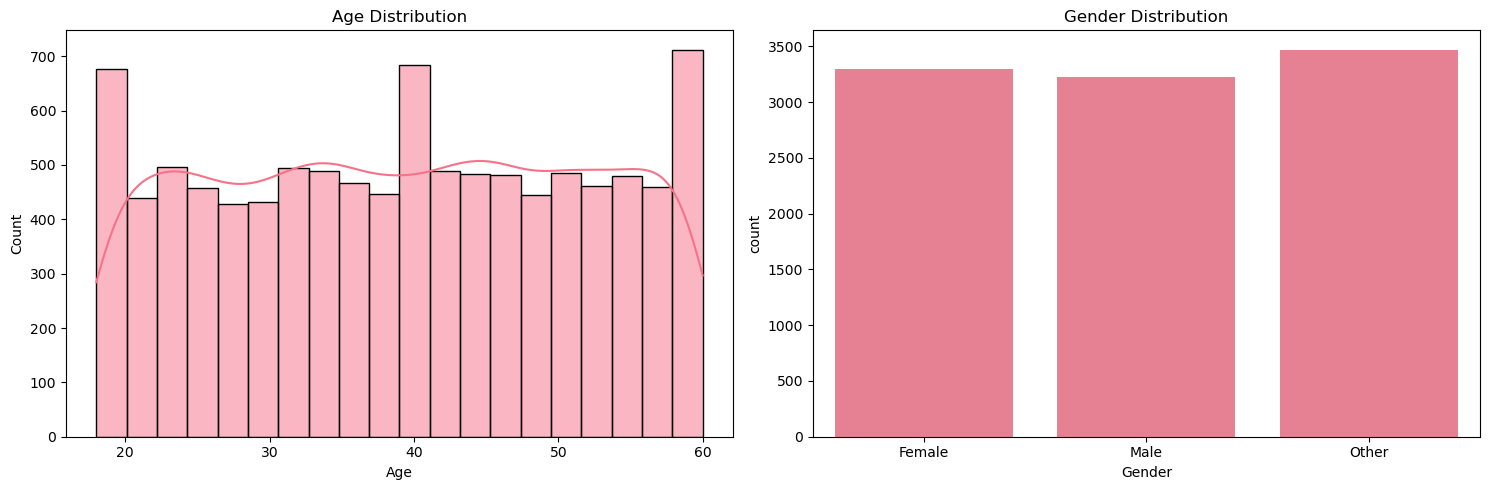

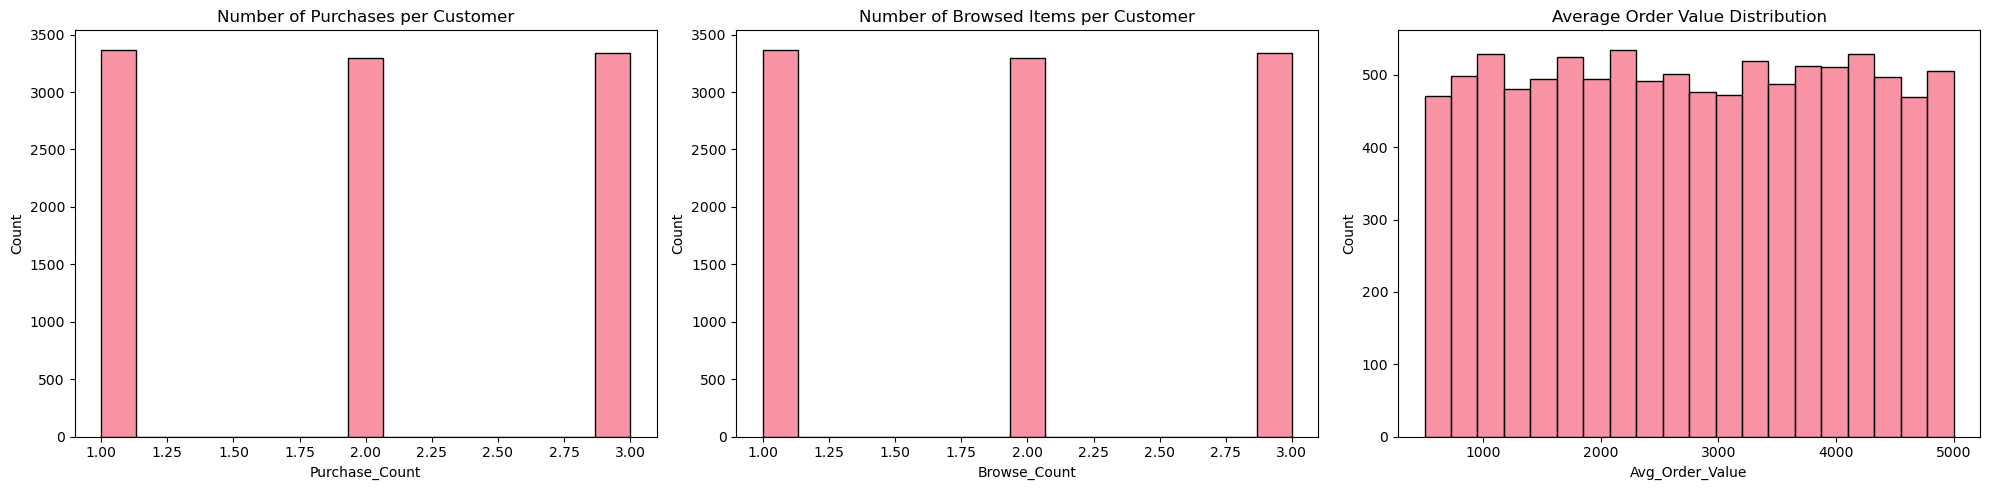

In [281]:


# Demographic analysis
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=users, x='Age', bins=20, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.countplot(data=users, x='Gender', ax=ax[1])
ax[1].set_title('Gender Distribution')
plt.tight_layout()
plt.show()


# Behavioral analysis
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Purchase frequency
users['Purchase_Count'] = users['Purchase_History'].apply(len)
sns.histplot(data=users, x='Purchase_Count', bins=15, ax=ax[0])
ax[0].set_title('Number of Purchases per Customer')

# Browsing behavior
users['Browse_Count'] = users['Browsing_History'].apply(len)
sns.histplot(data=users, x='Browse_Count', bins=15, ax=ax[1])
ax[1].set_title('Number of Browsed Items per Customer')

# Spending analysis
sns.histplot(data=users, x='Avg_Order_Value', bins=20, ax=ax[2])
ax[2].set_title('Average Order Value Distribution')
plt.tight_layout()
plt.show()

 


## 3. Category Preference Analysis



Unique Categories: 6: {'Books', 'Electronics', 'Home Decor', 'Beauty', 'Fashion', 'Fitness'}
Unique Subcategories: 24: {'Non-fiction', 'Smartwatch', 'Shoes', 'Treadmill', 'Curtains', 'Biography', 'Wall Art', 'T-shirt', 'Comics', 'Laptop', 'Jeans', 'Jacket', 'Resistance Bands', 'Dumbbells', 'Perfume', 'Cushions', 'Yoga Mat', 'Smartphone', 'Lipstick', 'Foundation', 'Lamp', 'Fiction', 'Headphones', 'Moisturizer'}


C:\Users\JAYDEV\AppData\Local\Temp\ipykernel_5396\1119472547.py:11: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



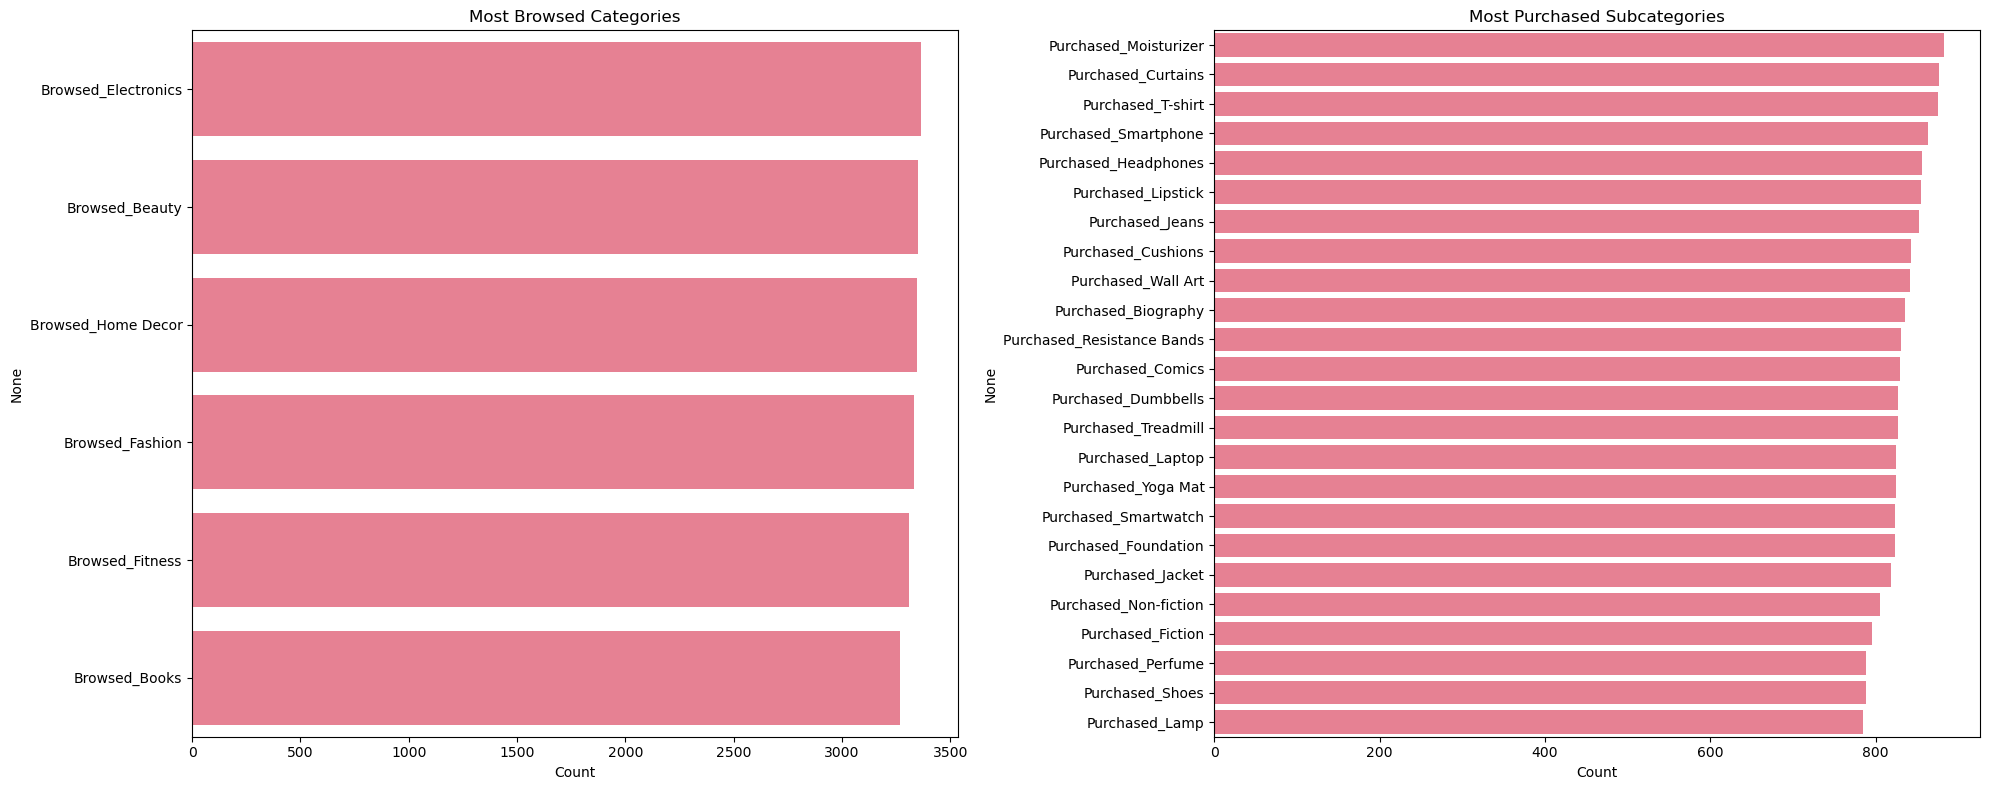

In [282]:
# Extract all unique categories
categories = set(products['Category'].unique())
subcategories = set(products['Subcategory'].unique())

print(f"Unique Categories: {len(categories)}: {categories}")
print(f"Unique Subcategories: {len(subcategories)}: {subcategories}")

# Create category preference matrix with unique column names
category_matrix = pd.DataFrame(index=users['Customer_ID'], 
                               columns=[f"Browsed_{cat}" for cat in categories] + [f"Purchased_{cat}" for cat in subcategories])
category_matrix = category_matrix.fillna(0)  # Initialize with zeros

# Populate the matrix
for index, row in users.iterrows():
    for cat in row['Browsing_History']:
        if cat in categories:
            category_matrix.at[row['Customer_ID'], f"Browsed_{cat}"] += 1
    for cat in row['Purchase_History']:
        if cat in subcategories:
            category_matrix.at[row['Customer_ID'], f"Purchased_{cat}"] += 1

# Plot top categories
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

browse_counts = category_matrix.filter(like='Browsed').sum().sort_values(ascending=False)
sns.barplot(y=browse_counts.index, x=browse_counts.values, ax=ax[0])
ax[0].set_title('Most Browsed Categories')
ax[0].set_xlabel('Count')

purchase_counts = category_matrix.filter(like='Purchased').sum().sort_values(ascending=False)
sns.barplot(y=purchase_counts.index, x=purchase_counts.values, ax=ax[1])
ax[1].set_title('Most Purchased Subcategories')
ax[1].set_xlabel('Count')
plt.tight_layout()
plt.show()


# category sub-category analysis

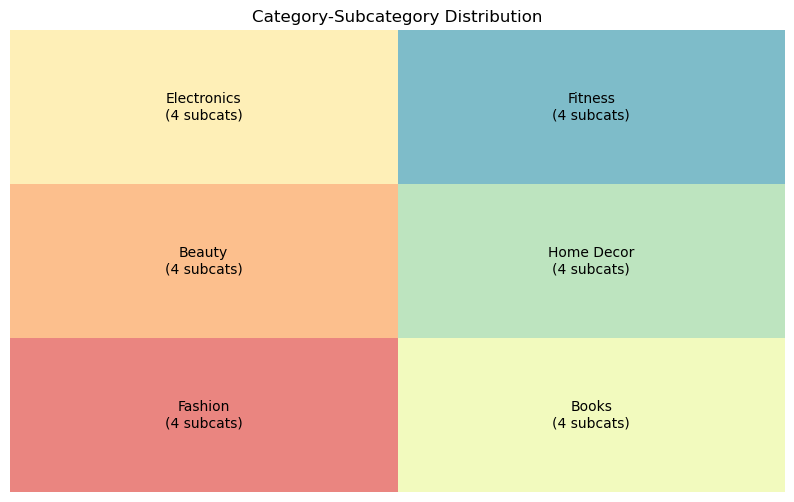

In [283]:
#! pip install squarify
import squarify
# Create category-subcategory mapping
category_subcat = {}
for _, row in products.iterrows():
    if row['Category'] not in category_subcat:
        category_subcat[row['Category']] = set()
    category_subcat[row['Category']].add(row['Subcategory'])

# Visualize hierarchy
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=[len(v) for v in category_subcat.values()],
    label=[f"{k}\n({len(v)} subcats)" for k,v in category_subcat.items()],
    color=sns.color_palette("Spectral", len(category_subcat)),
    alpha=0.7
)
plt.title('Category-Subcategory Distribution')
plt.axis('off')
plt.show()

In [284]:
import plotly.express as px

# Prepare hierarchy data
hierarchy = []
for cat, subcats in category_subcat.items():
    for subcat in subcats:
        hierarchy.append({'category': cat, 'subcategory': subcat})

hierarchy_df = pd.DataFrame(hierarchy)

# Create visualization
fig = px.sunburst(
    hierarchy_df, 
    path=['category', 'subcategory'],
    title='Product Category-Subcategory Hierarchy'
)
fig.update_traces(textinfo="label+percent parent")
fig.show()


 
## 4. Advanced Behavioral Patterns



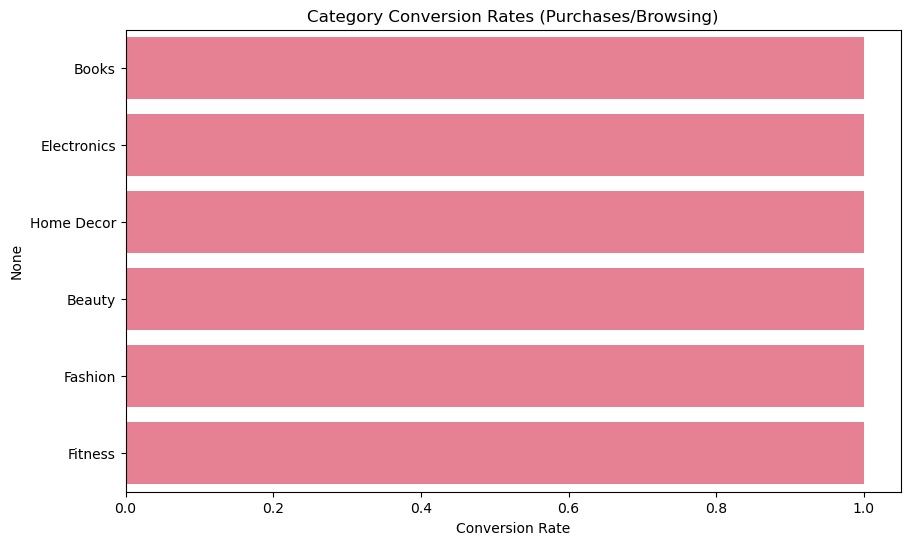

In [285]:
# Conversion rates (Purchase/Browse)
conversion_rates = {}
for category in categories:
    browsed = category_matrix[f'Browsed_{category}'].sum()
    purchased = sum(category_matrix[f'Purchased_{subcat}'].sum() for subcat in subcategories if subcat in category_subcat[category])
    conversion_rates[category] = purchased / browsed if browsed > 0 else 0

conversion_df = pd.DataFrame.from_dict(conversion_rates, orient='index', columns=['Conversion_Rate'])
conversion_df = conversion_df.sort_values('Conversion_Rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=conversion_df.index, x=conversion_df['Conversion_Rate'])
plt.title('Category Conversion Rates (Purchases/Browsing)')
plt.xlabel('Conversion Rate')
plt.show()


In [286]:

# Customer Segments Preliminary Analysis
from sklearn.decomposition import PCA

# Prepare numerical features
features = pd.DataFrame({
    'Age': users['Age'],
    'Avg_Order_Value': users['Avg_Order_Value'],
    'Purchase_Count': users['Purchase_Count'],
    'Browse_Count': users['Browse_Count'],
   # 'Gender':users['Gender'],
    'Location': users['Location'],
    'Customer_Segment': users['Customer_Segment']
   
})

# Encode categorical variables
# features['Gender'] = features['Gender'].astype('category').cat.codes
features['Location'] = features['Location'].astype('category').cat.codes
features['Customer_Segment'] = features['Customer_Segment'].astype('category').cat.codes

# Add category features
for category in categories:
    if f'Browsed_{category}' in category_matrix.columns:
        features[f'Browsed_{category}'] = category_matrix[f'Browsed_{category}']
    for subcat in subcategories:
        if subcat.startswith(category) and f'Purchased_{subcat}' in category_matrix.columns:
            features[f'Purchased_{subcat}'] = category_matrix[f'Purchased_{subcat}']


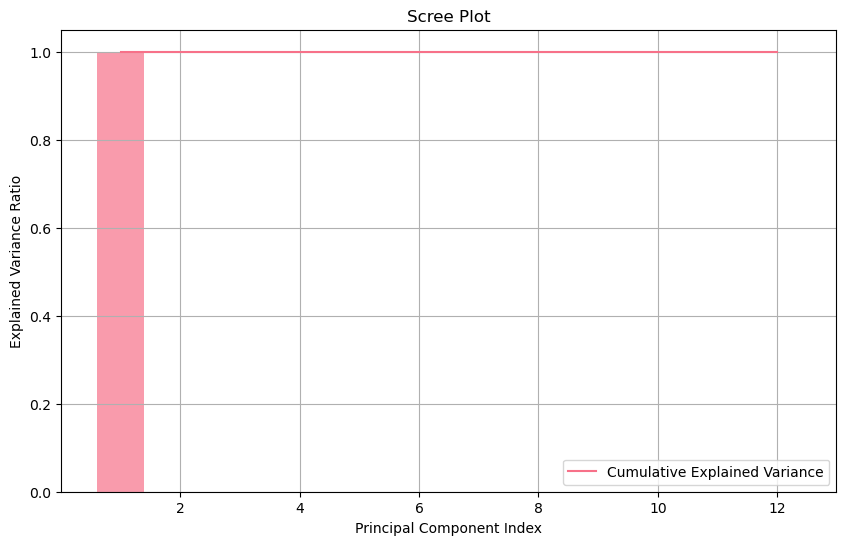

In [287]:
# Scree plot to find the optimum number of components
pca = PCA()
pca.fit(features.fillna(0))
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()


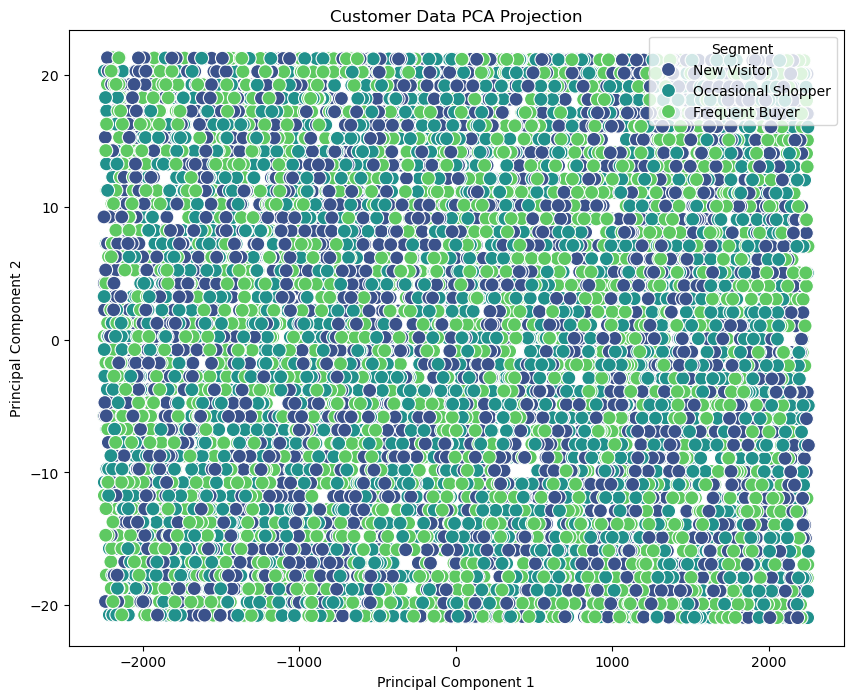

In [288]:

# PCA Visualization
pca = PCA(n_components=5)
components = pca.fit_transform(features.fillna(0))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=components[:, 0], y=components[:, 1], 
                hue=users['Customer_Segment'] if 'Customer_Segment' in users.columns else None,
                palette='viridis', s=100)
plt.title('Customer Data PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
if 'Customer_Segment' in users.columns:
    plt.legend(title='Segment')
plt.show()


## 5. Product Data Analysis


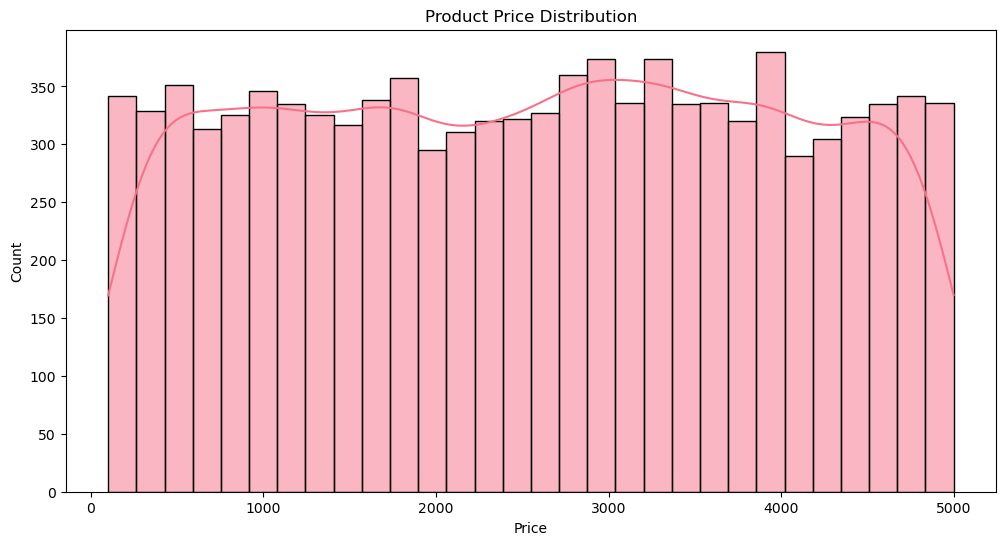

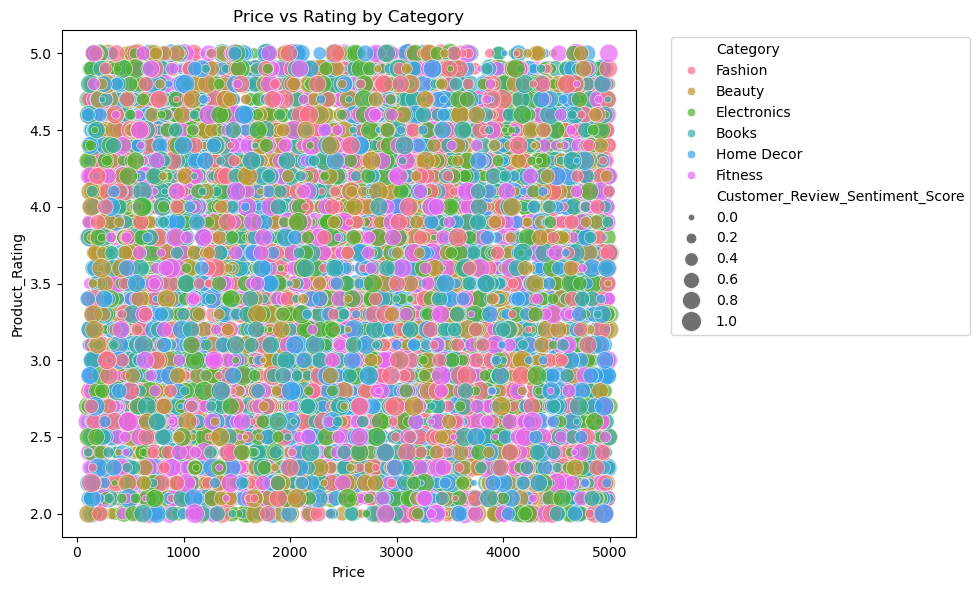

In [289]:


# Product price distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=products, x='Price', bins=30, kde=True)
plt.title('Product Price Distribution')
plt.show()


# Price vs Rating analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=products, x='Price', y='Product_Rating', 
                hue='Category', size='Customer_Review_Sentiment_Score',
                sizes=(20, 200), alpha=0.7)
plt.title('Price vs Rating by Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Category-wise analysis
category_stats = products.groupby('Category').agg({
    'Price': ['mean', 'median', 'std'],
    'Product_Rating': 'mean',
    'Customer_Review_Sentiment_Score': 'mean'
}).sort_values(('Product_Rating', 'mean'), ascending=False)

display(category_stats.style.background_gradient(cmap='Blues'))

 


## 6. Key Recommendations for Clustering



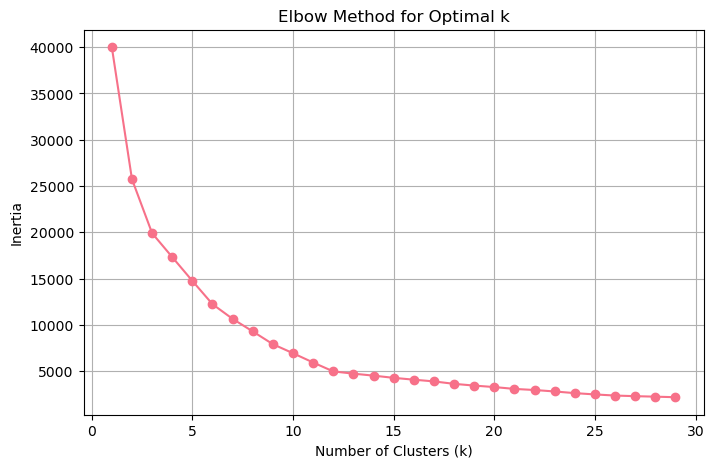

In [290]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = features[['Age', 'Avg_Order_Value', 'Purchase_Count', 'Browse_Count']].fillna(0)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Calculate inertia for different values of k
inertia = []
k_values = range(1, 30)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [292]:

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

def visualize_clusters(users, features, n_clusters=4):
    """
    Performs PCA and clustering visualization with interactive plot
    
    Parameters:
    - users: DataFrame with original user data
    - features: Processed features for clustering
    - n_clusters: Number of clusters to create
    """
    users.fillna(0, inplace=True)  # Fill NaN values for PCA
    features.fillna(0, inplace=True)  # Fill NaN values for PCA

    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_features)
    
    # Cluster in PCA space
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(principal_components)
    
    # Create visualization DataFrame
    viz_df = pd.DataFrame({
        'Customer_ID': users['Customer_ID'],
        'PC1': principal_components[:, 0],
        'PC2': principal_components[:, 1],
        'Cluster': clusters,
        'Age': users['Age'],
        'Avg_Order_Value': users['Avg_Order_Value'],
        'Top_Category': users['Purchase_History'].apply(
            lambda x: max(set(x), key=x.count) if x else 'None')
    })
    
    # Interactive 3D plot
    fig = px.scatter_3d(
        viz_df,
        x='PC1',
        y='PC2',
        z='Avg_Order_Value',
        color='Cluster',
        hover_data=['Customer_ID', 'Age', 'Top_Category'],
        title=f'Customer Segments (PCA + K-Means, {n_clusters} clusters)',
        labels={'PC1': 'Shopping Frequency',
               'PC2': 'Category Preference',
               'Avg_Order_Value': 'Spending Level'},
        height=800
    )
    
    # Add cluster centers
    centers = kmeans.cluster_centers_
    fig.add_trace(
        px.scatter_3d(
            pd.DataFrame({
                'PC1': centers[:, 0],
                'PC2': centers[:, 1],
                'Avg_Order_Value': [viz_df['Avg_Order_Value'].mean()]*n_clusters,
                'Cluster': range(n_clusters)
            }),
            x='PC1',
            y='PC2',
            z='Avg_Order_Value',
            color='Cluster',
            symbol_sequence=['x']
        ).data[0]
    )
    
    fig.update_traces(
        marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')),
        selector=dict(mode='markers')
    )
    
    fig.show()
    
    # Return cluster assignments
    return viz_df[['Customer_ID', 'Cluster']]

# Example usage:
cluster_assignments = visualize_clusters(users, features, n_clusters=6)

In [293]:
cluster_assignments.columns

Index(['Customer_ID', 'Cluster'], dtype='object')

In [294]:
def profile_clusters(users, cluster_assignments):
    """
    Generates comprehensive cluster profiles with visualizations
    
    Parameters:
    - users: DataFrame with customer data
    - cluster_assignments: DataFrame with 'Customer_ID' and 'Cluster' columns
    
    Returns:
    - Tuple of (profile_df, figs) containing:
        - profile_df: DataFrame with cluster statistics
        - figs: List of visualization objects
    """
    # Merge data and convert lists
    clustered_users = users.merge(cluster_assignments, on='Customer_ID')
    clustered_users['Purchase_History'] = clustered_users['Purchase_History'].apply(
        lambda x: x if isinstance(x, list) else [])
    clustered_users['Browsing_History'] = clustered_users['Browsing_History'].apply(
        lambda x: x if isinstance(x, list) else [])
    
    # Generate profile statistics
    profiles = []
    category_affinity = {}
    
    for cluster in sorted(clustered_users['Cluster'].unique()):
        cluster_data = clustered_users[clustered_users['Cluster'] == cluster]
        
        # Get all purchased items
        purchased_items = [item for sublist in cluster_data['Purchase_History'] for item in sublist]
        purchased_series = pd.Series(purchased_items)
        
        # Get all browsed items
        browsed_items = [item for sublist in cluster_data['Browsing_History'] for item in sublist]
        browsed_series = pd.Series(browsed_items)
        
        # Calculate conversion rates per category
        conversion_rates = {}
        unique_categories = set(purchased_items + browsed_items)
        for cat in unique_categories:
            purchased = purchased_series[purchased_series == cat].count()
            browsed = browsed_series[browsed_series == cat].count()
            conversion_rates[cat] = purchased / browsed if browsed > 0 else 0
        
        profile = {
            'Cluster': cluster,
            'Size': f"{len(cluster_data)} ({len(cluster_data)/len(users)*100:.1f}%)",
            'Avg Age': f"{cluster_data['Age'].mean():.1f}",
            'Avg Order Value': f"${cluster_data['Avg_Order_Value'].mean():.2f}",
            'Top Purchased Category': purchased_series.mode()[0] if not purchased_series.empty else "None",
            'Top Browsed Category': browsed_series.mode()[0] if not browsed_series.empty else "None",
            'Avg Purchase Frequency': f"{cluster_data['Purchase_History'].apply(len).mean():.1f}",
            'Conversion Rate': f"{len(purchased_items)/len(browsed_items)*100:.1f}%" if browsed_items else "N/A",
            'Premium Customer': cluster_data['Avg_Order_Value'].mean() > users['Avg_Order_Value'].mean()
        }
        profiles.append(profile)
        
        # Store for visualization
        category_affinity[cluster] = {
            'purchased': dict(purchased_series.value_counts(normalize=True).items()),
            'browsed': dict(browsed_series.value_counts(normalize=True).items())
        }
    
    # Create profile dataframe
    profile_df = pd.DataFrame(profiles)
    
    # Generate visualizations
    figs = []
    
    # 1. Cluster-category bar chart
    cluster_bar = px.bar(
        pd.DataFrame({
            'Cluster': list(category_affinity.keys()),
            'Top Categories': [
                sorted(data['purchased'], key=lambda x: x[1], reverse=True)[0][0] 
                if data['purchased'] else "None"
                for data in category_affinity.values()
            ]
        }),
        x='Cluster',
        y='Top Categories',
        color='Cluster',
        title='Dominant Categories by Cluster',
        labels={'Top Categories': 'Most Purchased Category'}
    )
    figs.append(cluster_bar)
    
    # 2. Individual cluster pies (separate figures)
    for cluster, data in category_affinity.items():
        if data['purchased']:
            fig_purchased = px.pie(
                names=list(data['purchased'].keys()),
                values=list(data['purchased'].values()),
                title=f"Cluster {cluster} Purchase Distribution"
            )
            figs.append(fig_purchased)
        
        if data['browsed']:
            fig_browsed = px.pie(
                names=list(data['browsed'].keys()),
                values=list(data['browsed'].values()),
                title=f"Cluster {cluster} Browsing Distribution"
            )
            figs.append(fig_browsed)
    
    return profile_df, figs

# Example usage:
profiles, visualizations = profile_clusters(users, cluster_assignments)

# Display results
display(profiles)

# Show visualizations one by one
for viz in visualizations:
    viz.show()

Cluster          Size Avg Age Avg Order Value Top Purchased Category  \
0        0  1628 (16.3%)    33.0        $2241.78              Dumbbells   
1        1  1764 (17.6%)    32.9        $2292.17             Headphones   
2        2  1656 (16.6%)    32.8        $2234.72                T-shirt   
3        3  1605 (16.1%)    45.2        $3272.64               Curtains   
4        4  1680 (16.8%)    45.4        $3247.36              Dumbbells   
5        5  1667 (16.7%)    46.0        $3250.46             Smartwatch   

  Top Browsed Category Avg Purchase Frequency Conversion Rate  \
0              Fitness                    2.0          100.0%   
1              Fashion                    1.0          100.0%   
2               Beauty                    3.0          100.0%   
3           Home Decor                    1.0          100.0%   
4           Home Decor                    3.0          100.0%   
5          Electronics                    2.0          100.0%   

   Premium Customer  
0             False  
1             False  
2             False  
3              True  
4              True  
5              True

In [295]:
def generate_strategies(cluster_profiles, clustered_users):
    # Convert 'Avg Order Value' to numeric
    cluster_profiles['Avg Order Value'] = cluster_profiles['Avg Order Value'].replace(r'[\$,]', '', regex=True).astype(float)
    
    strategies = []
    for _, profile in cluster_profiles.iterrows():
        if profile['Avg Order Value'] > clustered_users['Avg_Order_Value'].mean():
            strategy = "Premium upsell opportunities"
        else:
            strategy = "Value bundle recommendations"
        
        strategies.append({
            'Cluster': profile['Cluster'],
            'Targeting Strategy': strategy,
            'Recommended Campaign': f"Focus on {profile['Top Purchased Category']} products",
            'Channel': "Email" if float(profile['Avg Age']) > 35 else "Social Media"
        })
    
    return pd.DataFrame(strategies)

# Example usage:
strategies_df = generate_strategies(profiles, users.merge(cluster_assignments, on='Customer_ID'))
display(strategies_df)

Cluster            Targeting Strategy          Recommended Campaign  \
0        0  Value bundle recommendations   Focus on Dumbbells products   
1        1  Value bundle recommendations  Focus on Headphones products   
2        2  Value bundle recommendations     Focus on T-shirt products   
3        3  Premium upsell opportunities    Focus on Curtains products   
4        4  Premium upsell opportunities   Focus on Dumbbells products   
5        5  Premium upsell opportunities  Focus on Smartwatch products   

        Channel  
0  Social Media  
1  Social Media  
2  Social Media  
3         Email  
4         Email  
5         Email

In [296]:
cluster_assignments.to_csv("../data/cluster_assignments.csv", index=False)